# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.12f}".format

# Given function

In [2]:
def given_function(x):
    return x**2 - 10*(np.sin(x))**15

# Function plot

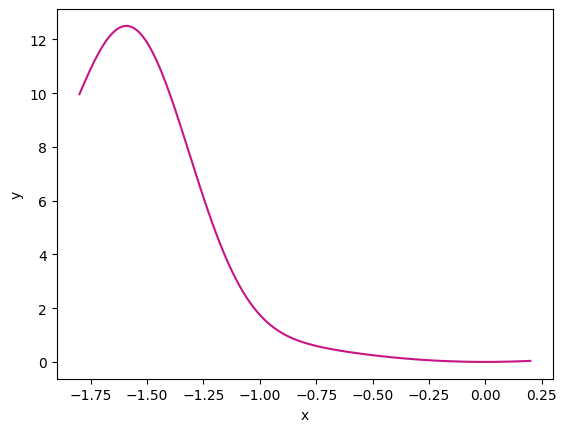

In [3]:
x = np.linspace(-1.8, 0.2, 1000)
y = x**2 - 10*(np.sin(x))**15

plt.plot(x, y, color='mediumvioletred')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Derivative function

In [4]:
def derivative(x):
    return 2 * (x - 75 * np.cos(x) * np.sin(x)**14)

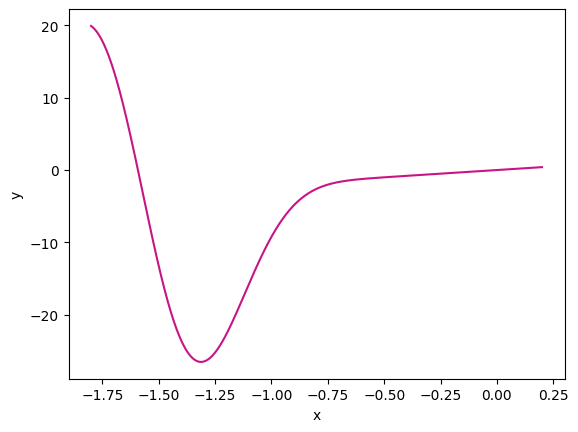

In [5]:
x = np.linspace(-1.8, 0.2, 1000)
y = derivative(x)

plt.plot(x, y, color='mediumvioletred')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Solution

## Newton method

In [6]:
def newtons_method(func, der, x_0, epsilon, max_iter, stop_condition):
    x_n = x_0
    for n in range(max_iter):
        f_xn = func(x_n)
        der_fxn = der(x_n)
        if der_fxn == 0:
            # Zero derivative. No solution found.
            return None, None
        if stop_condition == "abs" and abs(f_xn) < epsilon:
            # Found solution
            return x_n, n
        elif stop_condition == "points" and abs(f_xn / der_fxn) < epsilon:
            # Found solution
            return x_n, n
        x_n -= f_xn / der_fxn
    # Exceeded maximum number of iterations. No solution found.
    return None, np.inf
    

## Secant method

In [7]:
def secant(func, x_1, x_2, epsilon, max_iter, stop_condition):
    for n in range(max_iter):
        if func(x_1) == func(x_2):
            # Divided by zero
            return None, None
        x_1, x_2 = x_2, x_2 - (x_2 - x_1) * func(x_2) / (func(x_2) - func(x_1))
        if stop_condition == "abs" and abs(func(x_2)) < epsilon:
            # Found solution
            return x_2, n
        elif stop_condition == "points" and abs(x_1 - x_2) < epsilon:
            # Found solution
            return x_2, n
    # Exceeded maximum number of iterations. No solution found.
    return None, np.inf

# Main function

In [8]:
start = -1.8
stop = 0.2

def main(method, epsilon, max_iteration_nb, stop_condition):
    points = np.arange(start, stop + 0.1, 0.1)
    result = []
    
    for point in points:
        if method == 'newton':
            x, n = newtons_method(given_function, derivative, point, epsilon, max_iteration_nb, stop_condition)
            result += [x, n, point]
        elif method == 'secant':
            x, n = secant(given_function, point, stop, epsilon, 100, "points")
            result += [x, n, (point, stop)]
            x, n = secant(given_function, start, point, epsilon, 100, "points")
            result += [x, n, (start, point)]
            
    df = pd.DataFrame(data={"x value": result[::3],
                            "num of iterations": result[1::3],
                            "point": result[2::3]})
    return df



# Experiments

In [9]:
methods = ['newton', 'secant']
epsilons = [10**(-5), 10**(-10)]
stop_conditions = ['abs', 'points']

for method in methods:
    for sc in stop_conditions:
        for ep in epsilons:
            print('------------------------------------------------------------------------------------\n')
            print(f'method: {method}, stop_condition: {sc}, epsilon: {ep} \n')
            df = main(method, ep, 100, sc)
            print(df)
            print('\n\n')
                  

------------------------------------------------------------------------------------

method: newton, stop_condition: abs, epsilon: 1e-05 

           x value  num of iterations           point
0  -0.001841126317                 10 -1.800000000000
1  -0.002240539617                 13 -1.700000000000
2   0.002339411635                 13 -1.600000000000
3  -0.002425562885                  9 -1.500000000000
4  -0.001963096961                 11 -1.400000000000
5  -0.002296998056                 11 -1.300000000000
6  -0.002014943750                 11 -1.200000000000
7  -0.003036345057                 10 -1.100000000000
8  -0.002142560652                 10 -1.000000000000
9  -0.002914905123                  9 -0.900000000000
10 -0.002074238893                  9 -0.800000000000
11 -0.003074939642                  8 -0.700000000000
12 -0.002410138238                  8 -0.600000000000
13 -0.001960537931                  8 -0.500000000000
14 -0.003125854938                  7 -0.400000000